# Practica 2 robots

In [5]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt 
import pickle
import pathlib
import random



directory = "D:\\Robots\\git\\PracticaRobots2\\" # cambiar aqui
# directory = '/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/'

Para cargar un video y sacar capturas de él:

In [5]:
cap = cv2.VideoCapture(directory + 'landmarks_videos/all_landmarks_one_direction.mp4') # cambiar aqui

image_count = [45,43,64,62,48,71,64,63,65]

while(True):
    
    ret, frame = cap.read()
    
    if ret:
        
        
        cv2.imshow('habitacion_roja',frame)

        k = cv2.waitKey(10) # a mayor numero mas lento va
        if k & 0xFF == ord('q'):
            break
        
        if k >= 48 and k <= 57: 
            cv2.imwrite(directory + "landmarks_img/" + str(int(k) - 48) + "/landmark_" + str(int(k) - 48) + "_frame_" + str(image_count[int(k) - 48]) +".jpg", frame) # cambiar aqui
            image_count[int(k) - 48] += 1
        
            
#         if k==32:    # tecla espacio
            
#             # ojito que esto sobreescribe si hay una imagen ya...
#             cv2.imwrite(directory + "pruebas/prueba_estatico/landmark_0_" + str(image_count) + ".jpg", frame) # cambiar aqui
#             image_count+=1
    else:
        break

    
cap.release()
cv2.destroyAllWindows()

Calcular un histograma medio de un landmark:

(256, 1)


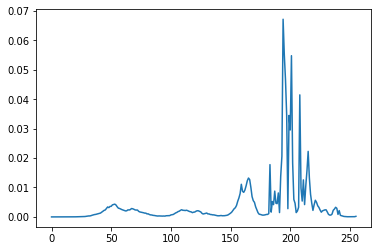

In [15]:
img_culquiera = hist_dict["landmark_0_frame_0.jpg"]
print(img_culquiera.shape)
plt.plot(img_culquiera)

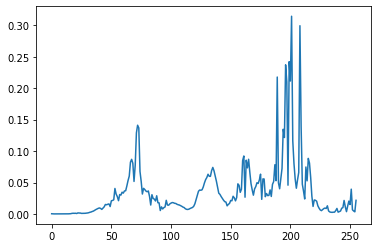

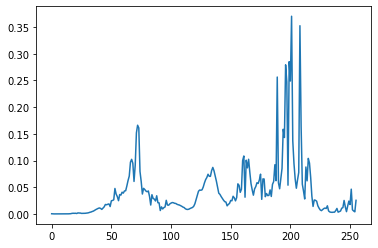

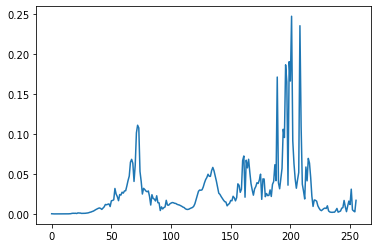

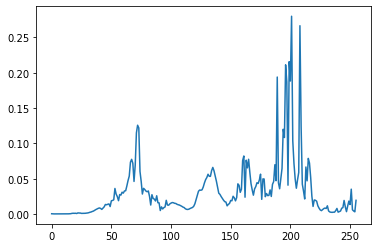

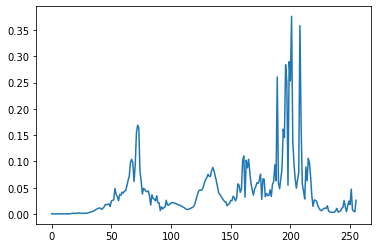

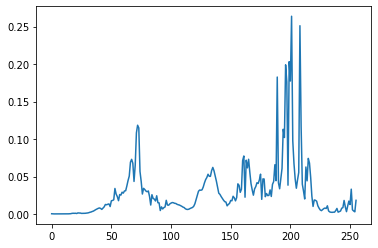

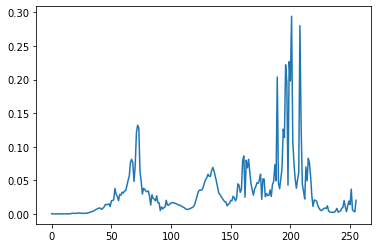

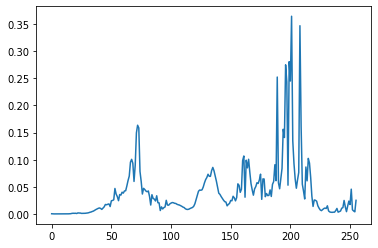

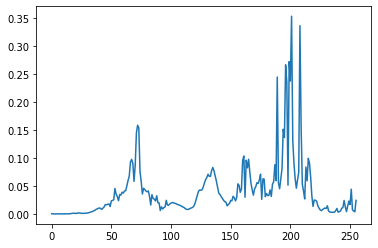

In [27]:

avg_landmark = [np.zeros((256,1), dtype=np.double)] * 9 
count_img = [0] * 9

for name, img in hist_dict.items():
    landmark = int(name[9])
    avg_landmark[landmark] += np.asarray(img, dtype=np.double)
    count_img[landmark] +=1

for i in range(9):
    avg_landmark[i] = avg_landmark[i] / count_img[i]
    plt.figure()
    plt.plot(avg_landmark[i])
    

Buscar imagenes repetidas:

In [3]:
from PIL import Image, ImageStat

for i in range(9):
    image_folder = os.path.join(os.getcwd(), 'landmarks_img/' + str(i))
    image_files = [_ for _ in os.listdir(image_folder) if _.endswith('jpg')]

    duplicate_files = []

    for file_org in image_files:
        if not file_org in duplicate_files:
            image_org = Image.open(os.path.join(image_folder, file_org))
            pix_mean1 = ImageStat.Stat(image_org).mean

            for file_check in image_files:
                if file_check != file_org:
                    image_check = Image.open(os.path.join(image_folder, file_check))
                    pix_mean2 = ImageStat.Stat(image_check).mean

                    if pix_mean1 == pix_mean2:
                        duplicate_files.append((file_org))
                        duplicate_files.append((file_check))

    print (list(dict.fromkeys(duplicate_files)))

[]
[]
[]
[]
[]
[]
['landmark_6_frame_43.jpg', 'landmark_6_frame_58.jpg', 'landmark_6_frame_46.jpg', 'landmark_6_frame_64.jpg', 'landmark_6_frame_50.jpg', 'landmark_6_frame_69.jpg', 'landmark_6_frame_78.jpg', 'landmark_6_frame_8.jpg']
[]
[]


Seleccionar conjunto de validacion:

In [17]:
filenames = [img for img in glob.glob(directory + "landmarks_img/"+ str(0) + "/*.jpg")]
filenames.sort()

random.shuffle(filenames)


In [18]:
import shutil
import os
# print(os.path.basename(your_path))

validation_percentaje = 0.20
destination = directory + "landmarks_img/validation/"

for i in range(9):
    validation_items = int(validation_percentaje * len(filenames))
    filenames = [img for img in glob.glob(directory + "landmarks_img/"+ str(i) + "/*.jpg")]
    random.shuffle(filenames)
    
    validation_images = filenames[:validation_items]
        
    for img in validation_images:
        shutil.move(img, destination + os.path.basename(img))

    

Sacar los histogramas:

In [3]:
def load_images(filenames, gray_scale=True):
    """
        Load multiple images.
        
        Parameters:
            filename is an array of paths
            gray_scale whether the images will be load in gray scale or not 
            
        Returns:
            (images, images_name)
    """
    
    filenames.sort()
    images = []
    images_names = []
    
    u=0
    for img in filenames:
        if gray_scale:
            i = cv2.imread(img)
            gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
            images.append(gray)
        else:
            images.append(cv2.imread(img))
            
        images_names.append(os.path.basename(filenames[u]))
        u+=1
    
    return (images, images_names)

Renombrar los landmarks: (ya no deberia usarse)

In [ ]:
estas_seguro = False

if estas_seguro: # por si acaso lo ejecutamos sin querer
    for l in range(1,10):
        f = 0
        for path in pathlib.Path(directory + 'landmarks_img/'+ str(l)).iterdir():
            if path.is_file():

                old_name = path.stem

                old_extension = path.suffix

                new_name = 'landmark_' + str(l-1) + '_frame_' + str(f) + old_extension

                path.rename(pathlib.Path(directory + 'landmarks_img/'+ str(l), new_name))
                f+=1


Se calculan los histogramas, se normalizan y se guardan en local

In [4]:
# codigo para cargar el archivo
def load_pickle(filename):
    return pickle.load(open(filename, 'rb'))



In [13]:
# blanco y negro
all_hist = []

output_dimension = (848, 480)

hist_dict = {}

for i in range(9):
    
    filenames = [img for img in glob.glob(directory + "landmarks_img/"+ str(i) + "/*.jpg")]
    filenames.sort()

    images    = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in filenames]
    img_names = [os.path.basename(img)                 for img in filenames]

    for i, img in enumerate(images):
        res_img = cv2.resize(img, output_dimension, interpolation=cv2.INTER_CUBIC)

        hist = cv2.calcHist([img],[0],None,[256],[0,256])
        hist_norm = hist / (output_dimension[0] * output_dimension[1])

        name = img_names[i]
        hist_dict[name] = hist_norm 
    
    print(len(hist_dict))

# guarda el objeto:
pickle.dump(hist_dict, open('landmarks_histograms/histogram_landmarks_.sav', 'wb'))
# por algun motivo no genera los .sav

73
135
228
310
371
458
536
599
664


In [9]:
# color
all_hist = []

output_dimension = (848, 480)

hist_dict = {}

for i in range(9):
    
    filenames = [img for img in glob.glob(directory + "landmarks_img/"+ str(i) + "/*.jpg")]
    filenames.sort()

    images    = [cv2.imread(img) for img in filenames]
    img_names = [os.path.basename(img) for img in filenames]
    
    img = images[0]

    for i, img in enumerate(images):
        res_img = cv2.resize(img, output_dimension, interpolation=cv2.INTER_CUBIC)
        bgr_planes = cv2.split(res_img)
        
        b_hist = np.squeeze(cv2.calcHist(bgr_planes,[0],None,[256],[0,256]))
        g_hist = np.squeeze(cv2.calcHist(bgr_planes,[1],None,[256],[0,256]))
        r_hist = np.squeeze(cv2.calcHist(bgr_planes,[2],None,[256],[0,256]))
        
        hist = np.stack((b_hist, g_hist, r_hist), axis=0)

        hist_norm = hist / (output_dimension[0] * output_dimension[1])

        name = img_names[i]
        hist_dict[name] = hist_norm 
        
    print(len(hist_dict))

# guarda el objeto:
pickle.dump(hist_dict, open('landmarks_histograms/histogram_landmarks_.sav', 'wb'))
# por algun motivo no genera los .sav

73
135
228
310
371
458
536
599
664


Mostrar histograma:

In [4]:

for i in range(9):
    f = random.randrange(0,len(all_hist[i]))
    img = all_hist[i]["landmark_" + str(i) + "_frame_" + str(f)+ ".jpg"]
    
    plt.figure()
    x = plt.plot(img)
    plt.savefig("example_landmark_" + str(i) + "_" + str(f) +".jpg")
    
                         
                     
                     

# plt.plot(all_hist[3]["landmark_3_frame_95.jpg"])
# plt.show()





NameError: name 'all_hist' is not defined

In [12]:
# knn blanco y negro
def knn(img, hist_dict):
    
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = hist / (output_dimension[0] * output_dimension[1])
    
    min_distance = 1000000
    min_key = ''
    
    for key, value in hist_dict.items():
        
        distance = np.linalg.norm(value-hist)
        
        if distance < min_distance:
            min_distance = distance
            min_key = key
    
    return int(min_key[9])

In [3]:
# KNN color
import statistics as stats

def knn(img, hist_dict):
    
    bgr_planes = cv2.split(img)

    b_hist = np.squeeze(cv2.calcHist(bgr_planes,[0],None,[256],[0,256]))
    g_hist = np.squeeze(cv2.calcHist(bgr_planes,[1],None,[256],[0,256]))
    r_hist = np.squeeze(cv2.calcHist(bgr_planes,[2],None,[256],[0,256]))

    hist = np.stack((b_hist, g_hist, r_hist), axis=0)
        
    hist = hist / (output_dimension[0] * output_dimension[1])
    
    min_distance = 1000000
    min_key = ''
    
    for key, value in hist_dict.items():
        
        distance = np.linalg.norm(value-hist)
        
        if distance < min_distance:
            min_distance = distance
            min_key = key
    
    return int(min_key[9])

Se comprueba el knn

In [30]:
# blanco y negro
import statistics as stats

# img = cv2.imread('/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmarks_img/3/landmark_3_frame_25.jpg', cv2.IMREAD_GRAYSCALE)

filenames = [img for img in glob.glob(directory + "landmarks_img/validation/*.jpg")]
filenames.sort()

all_img      = [0,0,0,0,0,0,0,0,0]
aciertos_img = [0,0,0,0,0,0,0,0,0]

for f in filenames:
    img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    name = os.path.basename(f)
    landmark = knn(img, hist_dict)
    
    all_img[int(name[9])] +=1
    if int(name[9]) == int(landmark):
        aciertos_img[int(name[9])] += 1
    else:
        print(name)
        
    print(name[9], landmark)

print(all_img)
print(aciertos_img)

porcentaje = []

for i in range(len(all_img)):
    x = (aciertos_img[i] * 100) / all_img[i]
    porcentaje.append(x)

print(porcentaje)
print(print(stats.mean(porcentaje)))


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-cff9bdsm\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


In [33]:
# color
import statistics as stats

# img = cv2.imread('/home/angel/Escritorio/Máster/Robots/Practica2/PracticaRobots2/landmarks_img/3/landmark_3_frame_25.jpg', cv2.IMREAD_GRAYSCALE)

filenames = [img for img in glob.glob(directory + "landmarks_img/validation/*.jpg")]
filenames.sort()

all_img      = [0,0,0,0,0,0,0,0,0]
aciertos_img = [0,0,0,0,0,0,0,0,0]

for f in filenames:
    img = cv2.imread(f)
    name = os.path.basename(f)
    landmark = knn(img, hist_dict)
    
    all_img[int(name[9])] +=1
    if int(name[9]) == int(landmark):
        aciertos_img[int(name[9])] += 1
    else:
        print(name)
        
    print(name[9], landmark)

print(all_img)
print(aciertos_img)

porcentaje = []

for i in range(len(all_img)):
    x = (aciertos_img[i] * 100) / all_img[i]
    porcentaje.append(x)

print(porcentaje)
print(print(stats.mean(porcentaje)))


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
2 2
2 2
2 2
2 2
2 2
landmark_2_frame_61.jpg
2 3
landmark_2_frame_63.jpg
2 3
2 2
2 2
2 2
2 2
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
[14, 14, 12, 18, 16, 12, 17, 17, 15]
[14, 14, 10, 18, 16, 12, 17, 17, 15]
[100.0, 100.0, 83.33333333333333, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
98.14814814814815
None


ha ido de puta madre

DINAMICOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [4]:
# colorrrrrrrrrr
cap = cv2.VideoCapture(directory + 'final_test_video.mp4') # cambiar aqui

while(True):
    
    ret, frame = cap.read()
    
    if ret:
        
        k = cv2.waitKey(1) # a mayor numero mas lento va
        if k & 0xFF == ord('q'):
            break
            
        ri = cv2.resize(frame, output_dimension)
        
        landmark = knn(ri, hist_dict)
        
        cv2.putText(frame,  
                'landmark = ' + str(landmark),  
                (50, 50),  
                cv2.FONT_HERSHEY_SIMPLEX , 1,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4) 
        
        
        cv2.imshow('prueba dinamica colorrrrrrrrrr',frame)
    else:
        break

        
cap.release()
cv2.destroyAllWindows()
        



In [14]:
# byn
cap = cv2.VideoCapture(directory + 'final_test_video.mp4') # cambiar aqui

while(True):
    
    ret, frame = cap.read()
    
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
       
        
        k = cv2.waitKey(1) # a mayor numero mas lento va
        if k & 0xFF == ord('q'):
            break
            
        ri = cv2.resize(frame, output_dimension)
        
        landmark = knn(ri, hist_dict)
        
        cv2.putText(gray,  
                'landmark = ' + str(landmark),  
                (50, 50),  
                cv2.FONT_HERSHEY_SIMPLEX , 1,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4) 
        cv2.imshow('prueba dinamica',gray)
    else:
        break

            
cap.release()
cv2.destroyAllWindows()
        

